In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from pandas_visual_analysis import VisualAnalysis

In [2]:
AQ = pd.read_excel('C:/Users/Arya/Desktop/AQ.xlsx')
AQ.head() # first five rows display

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
AQ.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [4]:
AQ.dropna(axis=0, how= 'all', inplace=True)
AQ.dropna(axis=1, inplace=True)

In [5]:
AQ.replace(to_replace= -200, value= np.NaN, inplace= True)
AQ

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [6]:
AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1),

In [7]:
AQ=AQ.dropna()
print(AQ.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [8]:
AQ.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,2.353567,1207.741838,231.025393,10.772367,965.983777,143.501814,963.178053,100.259976,1600.506550,1045.691052,15.599859,49.049557,0.831851
std,1.409496,241.826753,208.461912,7.417127,266.413137,81.829717,265.906153,31.493823,302.290036,400.130277,4.825555,15.266995,0.178506
min,0.300000,752.500000,7.000000,0.542781,447.500000,12.000000,461.250000,19.000000,955.000000,263.000000,6.275000,14.900000,0.402317
25%,1.300000,1016.875000,77.000000,4.804320,753.500000,81.000000,768.875000,78.500000,1369.125000,759.500000,11.875000,36.700000,0.718949
50%,2.000000,1172.000000,157.000000,9.125831,944.250000,128.000000,920.000000,99.000000,1556.250000,1009.000000,15.025000,49.550000,0.817693
75%,3.100000,1380.250000,318.500000,14.803204,1142.375000,187.000000,1131.000000,122.000000,1783.375000,1319.750000,18.350000,60.525001,0.927524
max,8.100000,2039.750000,1189.000000,39.202340,1754.250000,478.000000,1934.500000,196.000000,2679.000000,2358.500000,30.000000,83.224998,1.485238


In [9]:
AQ.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.936258,0.887167,0.972672,0.958444,0.951342,-0.823709,0.861432,0.939922,0.882942,0.318468,-0.105195,0.295589
PT08.S1(CO),0.936258,1.000000,0.781758,0.931404,0.936364,0.922894,-0.829552,0.866574,0.945006,0.935004,0.324937,-0.039592,0.407018
NMHC(GT),0.887167,0.781758,1.000000,0.897971,0.875056,0.811182,-0.774207,0.728052,0.848499,0.761909,0.367081,-0.160308,0.282137
C6H6(GT),0.972672,0.931404,0.897971,1.000000,0.984795,0.927335,-0.848710,0.846740,0.960851,0.896992,0.418266,-0.178082,0.313606
PT08.S2(NMHC),0.958444,0.936364,0.875056,0.984795,1.000000,0.926643,-0.910622,0.885027,0.957882,0.909109,0.445724,-0.193355,0.325284
NOx(GT),0.951342,0.922894,0.811182,0.927335,0.926643,1.000000,-0.814288,0.857425,0.912718,0.893379,0.238500,-0.042020,0.270676
PT08.S3(NOx),-0.823709,-0.829552,-0.774207,-0.848710,-0.910622,-0.814288,1.000000,-0.815213,-0.880199,-0.857531,-0.424083,0.096870,-0.463007
NO2(GT),0.861432,0.866574,0.728052,0.846740,0.885027,0.857425,-0.815213,1.000000,0.807764,0.839648,0.406911,-0.223035,0.214562
PT08.S4(NO2),0.939922,0.945006,0.848499,0.960851,0.957882,0.912718,-0.880199,0.807764,1.000000,0.918977,0.343745,0.012343,0.515559
PT08.S5(O3),0.882942,0.935004,0.761909,0.896992,0.909109,0.893379,-0.857531,0.839648,0.918977,1.000000,0.313561,-0.014575,0.440171


In [10]:
print('mode value for COGT column is', AQ['CO(GT)'].mode()[0])
print('mode value for PT08.S1(CO) column is' , AQ['PT08.S1(CO)'].mode()[0])
print('mode value for NMHC(GT) column is' , AQ['NMHC(GT)'].mode()[0])
print('mode value for C6H6(GT) column is' , AQ['C6H6(GT)'].mode()[0])
print('mode value for PT08.S2(NMHC) column is' , AQ['PT08.S2(NMHC)'].mode()[0])
print('mode value for NOx(GT) column is' , AQ['NOx(GT)'].mode()[0])
print('mode value for PT08.S3(NOx) column is' , AQ['PT08.S3(NOx)'].mode()[0])
print('mode value for NO2(GT) column is' , AQ['NO2(GT)'].mode()[0])
print('mode value for PT08.S4(NO2) column is' , AQ['PT08.S4(NO2)'].mode()[0])
print('mode value for PT08.S5(O3) column is' , AQ['PT08.S5(O3)'].mode()[0])
print('mode value for T column is' , AQ['T'].mode()[0])
print('mode value for RH column is' , AQ['RH'].mode()[0])
print('mode value for AH column is' , AQ['AH'].mode()[0])

mode value for COGT column is 1.9
mode value for PT08.S1(CO) column is 983.5
mode value for NMHC(GT) column is 66.0
mode value for C6H6(GT) column is 5.247305750259137
mode value for PT08.S2(NMHC) column is 775.75
mode value for NOx(GT) column is 61.0
mode value for PT08.S3(NOx) column is 579.0
mode value for NO2(GT) column is 114.0
mode value for PT08.S4(NO2) column is 1267.5
mode value for PT08.S5(O3) column is 789.5
mode value for T column is 10.975000143051
mode value for RH column is 26.5
mode value for AH column is 0.4023168089194366


In [11]:
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(AQ)

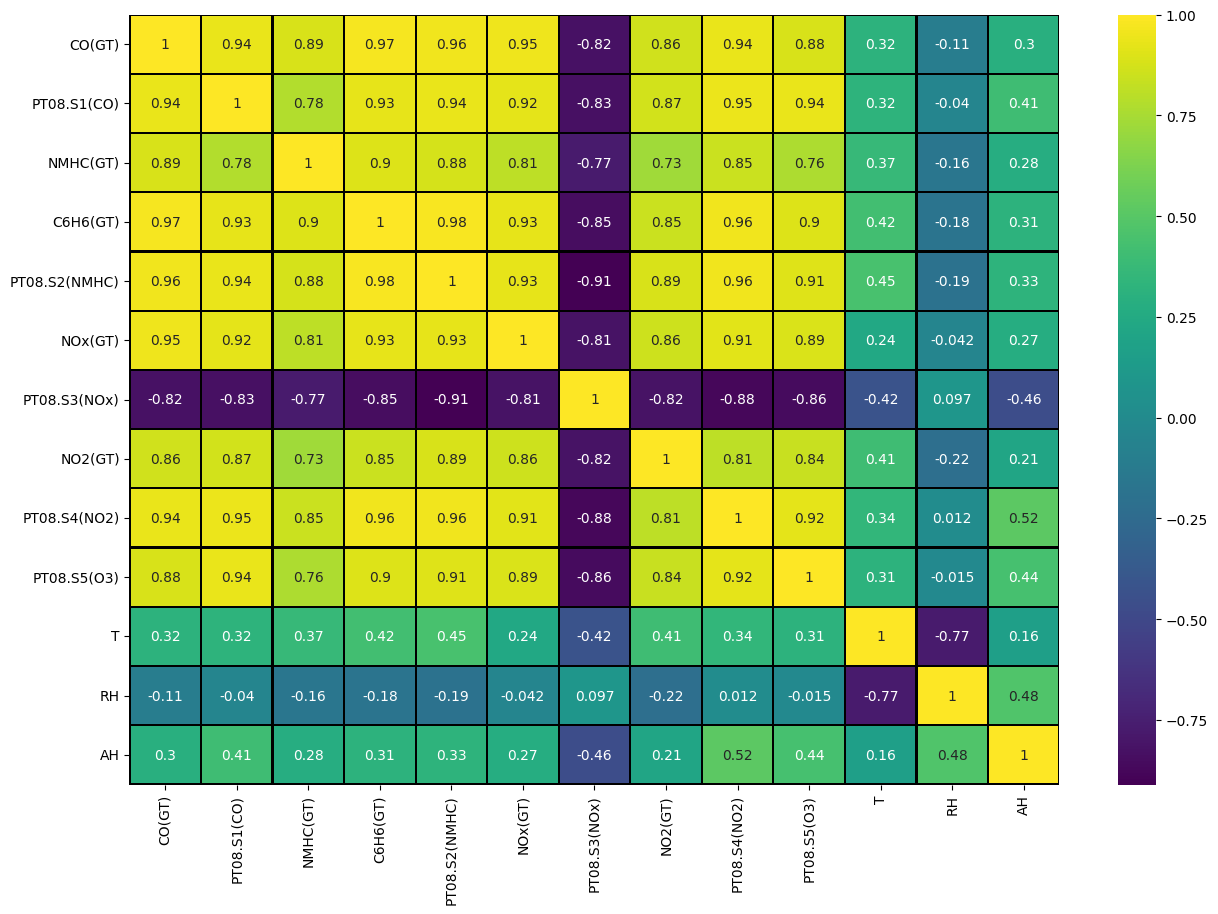

In [12]:
corrr = AQ.corr()
plt.figure(figsize=(15,10))
#heat map
a = sns.heatmap(AQ.corr(),annot=True,cmap='viridis',linecolor='k',linewidth=0.9)

In [13]:
sample_df = AQ.sample(n=750)

In [14]:
features = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH'] # X
X = sample_df.loc[:, features]
y = sample_df.loc[:, ['AH']]

In [15]:
sample_df.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.935078,0.888711,0.972212,0.957805,0.951175,-0.822287,0.862744,0.939380,0.881774,0.321706,-0.096772,0.302931
PT08.S1(CO),0.935078,1.000000,0.782169,0.931518,0.936879,0.922874,-0.829063,0.869940,0.944700,0.935571,0.331244,-0.032711,0.413386
NMHC(GT),0.888711,0.782169,1.000000,0.897350,0.874867,0.812191,-0.772205,0.729364,0.847764,0.760249,0.363385,-0.150696,0.282140
C6H6(GT),0.972212,0.931518,0.897350,1.000000,0.984556,0.926257,-0.846637,0.849096,0.960439,0.897162,0.421239,-0.169878,0.319044
PT08.S2(NMHC),0.957805,0.936879,0.874867,0.984556,1.000000,0.926636,-0.909948,0.887536,0.958137,0.910054,0.448091,-0.183026,0.332227
NOx(GT),0.951175,0.922874,0.812191,0.926257,0.926636,1.000000,-0.813284,0.863749,0.910606,0.892812,0.244498,-0.037574,0.276114
PT08.S3(NOx),-0.822287,-0.829063,-0.772205,-0.846637,-0.909948,-0.813284,1.000000,-0.816949,-0.879404,-0.856505,-0.426050,0.085201,-0.468299
NO2(GT),0.862744,0.869940,0.729364,0.849096,0.887536,0.863749,-0.816949,1.000000,0.811353,0.843154,0.406491,-0.211200,0.220926
PT08.S4(NO2),0.939380,0.944700,0.847764,0.960439,0.958137,0.910606,-0.879404,0.811353,1.000000,0.917664,0.348642,0.021747,0.522286
PT08.S5(O3),0.881774,0.935571,0.760249,0.897162,0.910054,0.892812,-0.856505,0.843154,0.917664,1.000000,0.326205,-0.014710,0.443377


In [16]:
AQ.shape[0]

827

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=.75) 

In [17]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(562, 12) (188, 12) (562, 1) (188, 1)


In [18]:
#from sklearn.linear_model import LinearRegression
Lin = LinearRegression()
Lin.fit(X_train, y_train)

LinearRegression()

In [19]:
print("predicted values of  are AH :", Lin.predict(X_test))
y_pred = Lin.predict(X_test)
y_pred.shape

predicted values of  are AH : [[0.49651508]
 [0.76575054]
 [0.81928859]
 [0.66396977]
 [0.86579573]
 [0.78799868]
 [0.83478488]
 [0.8488843 ]
 [0.7016219 ]
 [0.82103811]
 [0.88461479]
 [0.74507615]
 [0.68935727]
 [0.85527815]
 [0.8717293 ]
 [0.77693614]
 [0.9623737 ]
 [0.73865007]
 [0.85602711]
 [0.90818037]
 [0.89296449]
 [1.26352271]
 [0.87375832]
 [0.68900494]
 [0.89018027]
 [0.99749244]
 [0.63286304]
 [0.84215116]
 [0.68964131]
 [0.67837245]
 [0.54358228]
 [0.75639992]
 [0.92767699]
 [0.96810884]
 [0.88470033]
 [0.99019994]
 [0.62318734]
 [0.97096982]
 [1.00803014]
 [0.65752589]
 [1.13468056]
 [0.76365652]
 [0.94317722]
 [0.74061405]
 [0.85633155]
 [0.95648691]
 [1.23794825]
 [0.61342759]
 [1.22497939]
 [0.6409388 ]
 [0.78249142]
 [0.75721969]
 [0.60473564]
 [0.67974236]
 [0.75618525]
 [1.0838467 ]
 [0.8812058 ]
 [0.56445232]
 [0.49331975]
 [0.93523304]
 [0.82823889]
 [1.17409966]
 [0.92688209]
 [1.23267801]
 [0.59024611]
 [0.64397916]
 [0.8449493 ]
 [0.52688321]
 [0.76557519]
 [0.

(188, 1)

In [20]:
n = len(y)
k = X.shape[1]
print(k)

12


In [21]:
r2=Lin.score(X_test, y_test)
print("R^2 score for linear regression" , r2)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print("adjusted R^2 score", adj_r2)

R^2 score for linear regression 0.9409162474868387
adjusted R^2 score 0.9399542325205457


In [22]:
slope = Lin.coef_
print("coefficients" ,slope) # slope

coefficients [[ 3.09411864e-02  1.00280861e-04  4.71243719e-05 -2.92117068e-03
  -7.09387549e-04 -5.58102719e-04 -2.12249777e-04 -2.23864580e-04
   4.42682312e-04  5.34612636e-05  3.73223343e-02  1.24580221e-02]]


In [23]:
b0 = Lin.intercept_
print("intercept", b0)

intercept [-0.30634244]


In [24]:
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error" , MSE)

mean squared error 0.0018944580554106723


In [25]:
cod = r2_score(y_test, y_pred)
print("Coefficeient of determination", cod)

Coefficeient of determination 0.9409162474868387


In [26]:
Accuracy= r2_score(y_test,y_pred)*100
print("Accuracy of the model" , Accuracy,'%')

Accuracy of the model 94.09162474868387 %


In [27]:
Residue = (y_test-y_pred)
print("The residuals are" , Residue)

The residuals are             AH
449   0.031994
751  -0.023946
141  -0.109927
332   0.005766
783  -0.008221
...        ...
493  -0.058635
1071  0.026257
115  -0.027563
886   0.039670
1160 -0.014746

[188 rows x 1 columns]


In [28]:
variance = np.sum(Residue**2)/(len(y_test) - k)
print("variance", variance)

variance AH    0.002024
dtype: float64


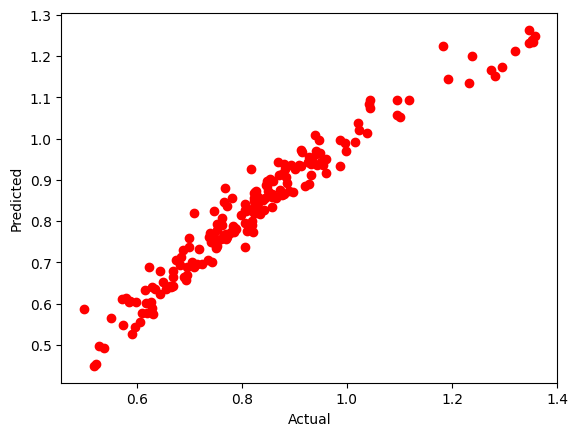

In [29]:
plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()

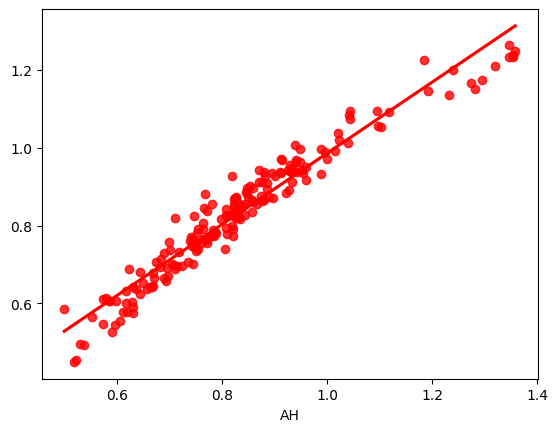

In [30]:
sns.regplot(x=y_test, y=y_pred,ci=None,color='red');

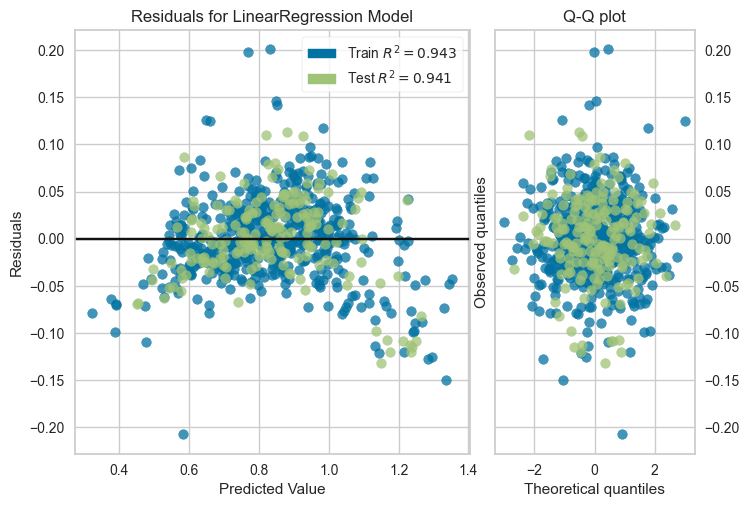

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [31]:
from yellowbrick.regressor import ResidualsPlot
model = LinearRegression()
residual = ResidualsPlot(model, hist=False, qqplot= True)
residual.fit(X_train, y_train)
residual.score(X_test, y_test)
residual.show()

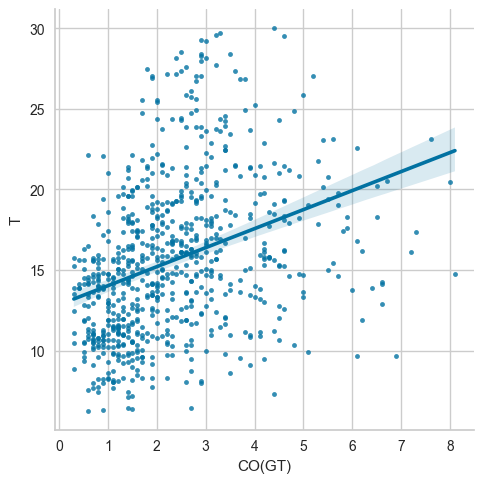

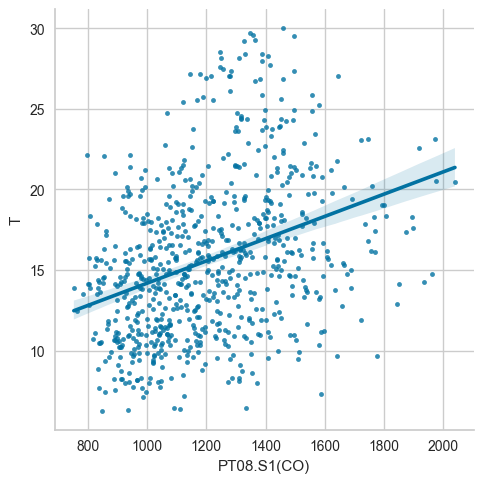

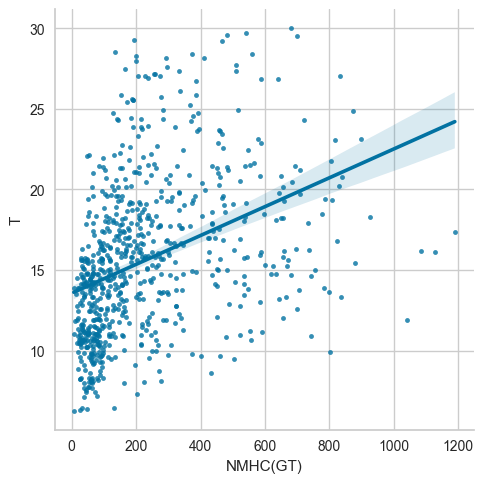

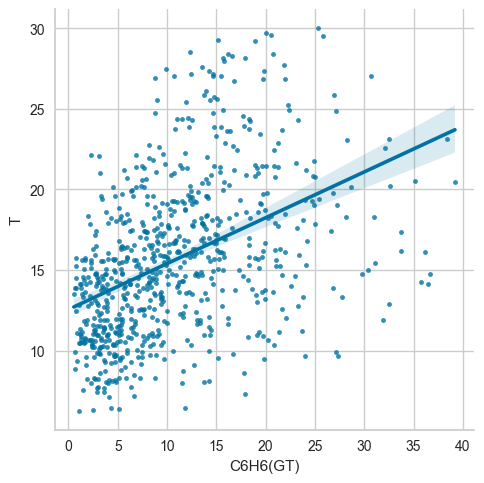

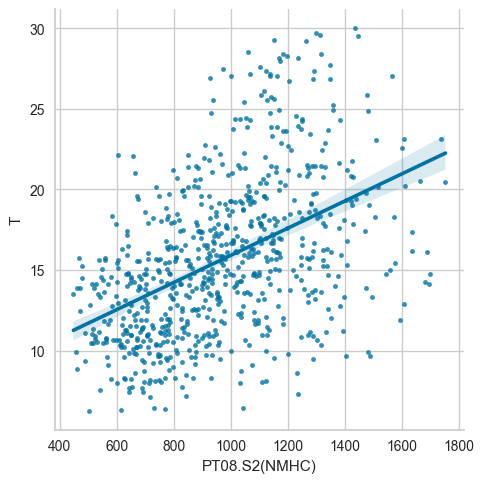

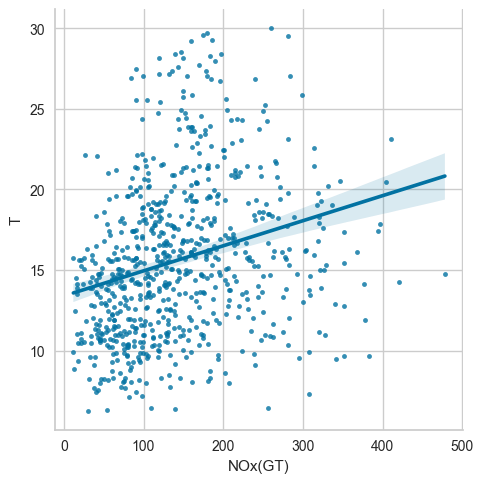

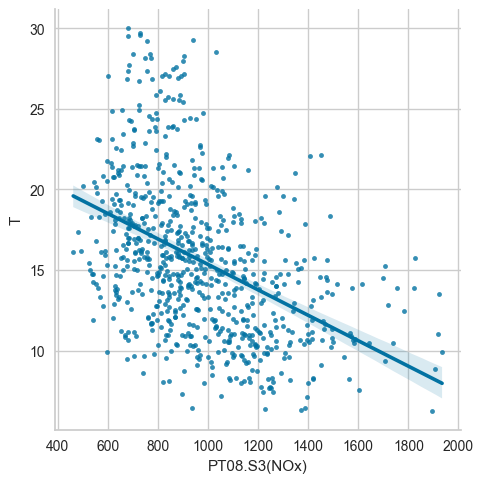

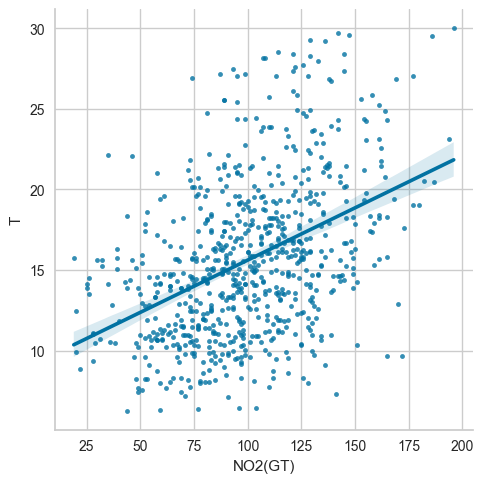

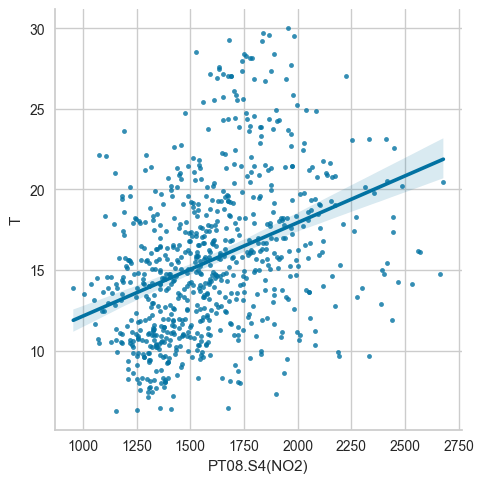

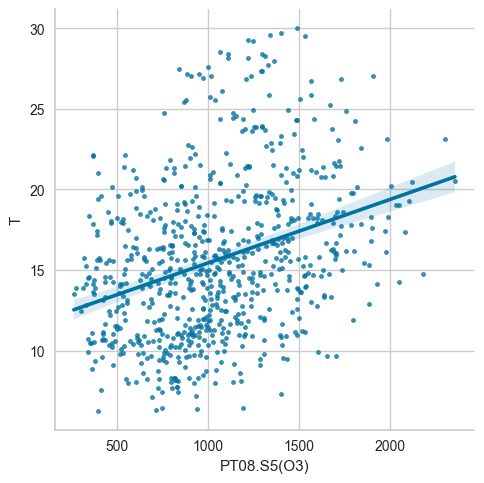

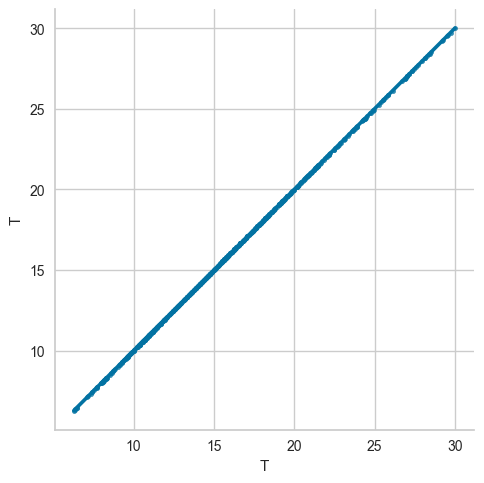

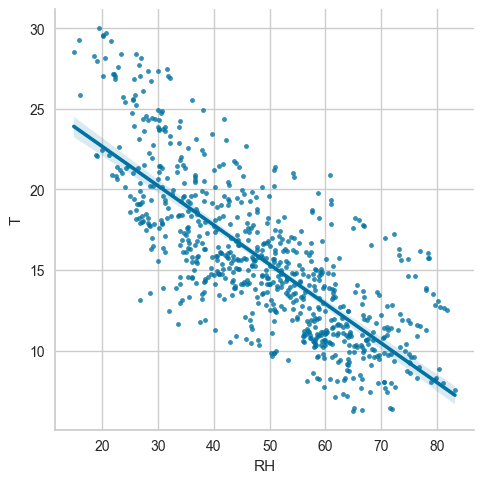

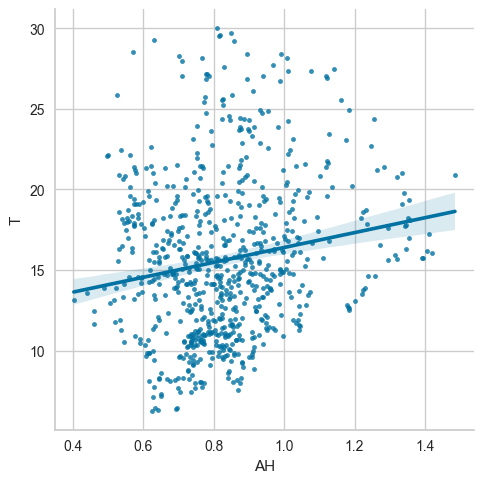

In [32]:
col_=sample_df.columns.tolist()[2:]
for i in sample_df.columns.tolist()[2:]:
    sns.lmplot(x=i,y='T',data=sample_df,markers='.')

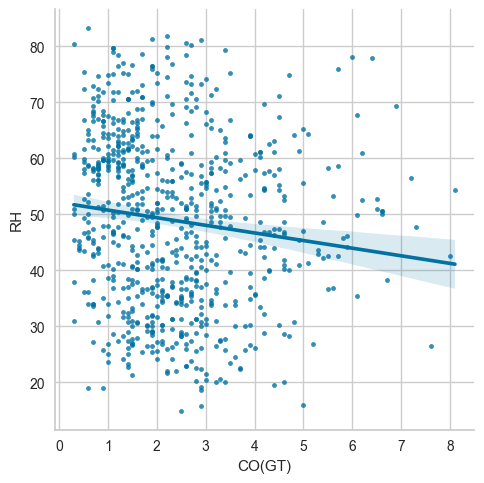

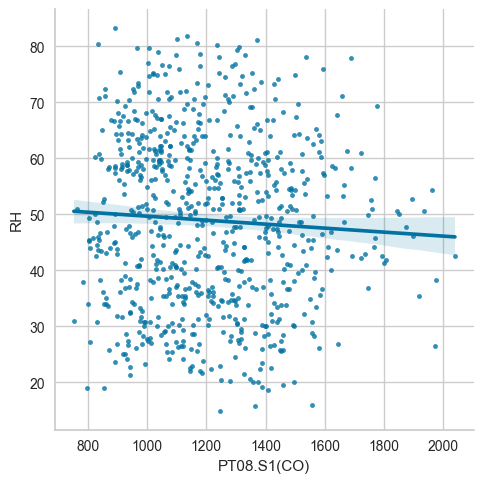

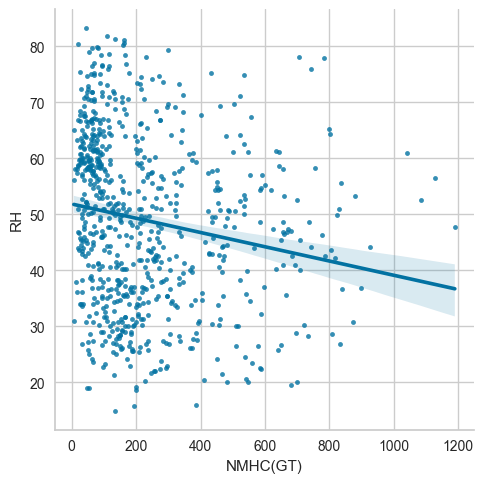

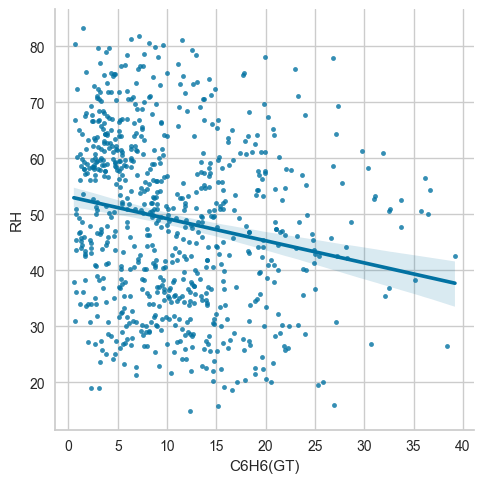

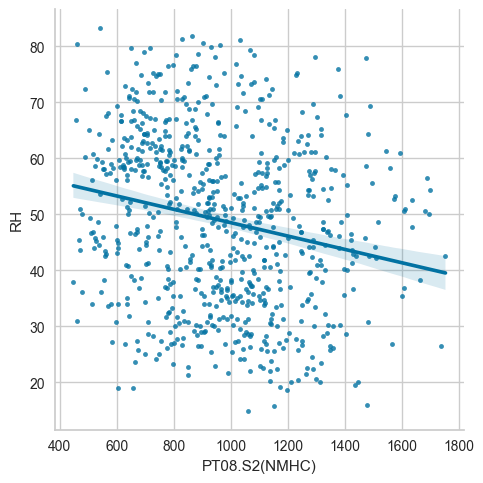

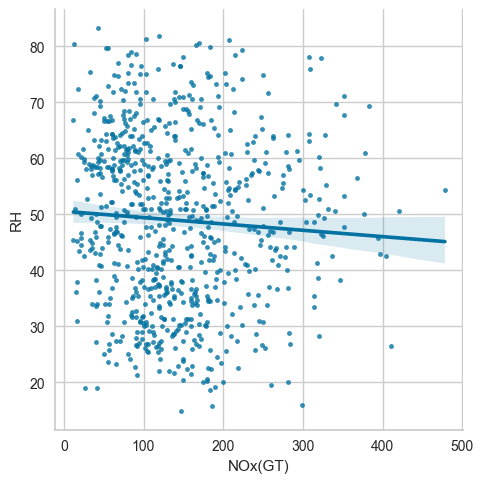

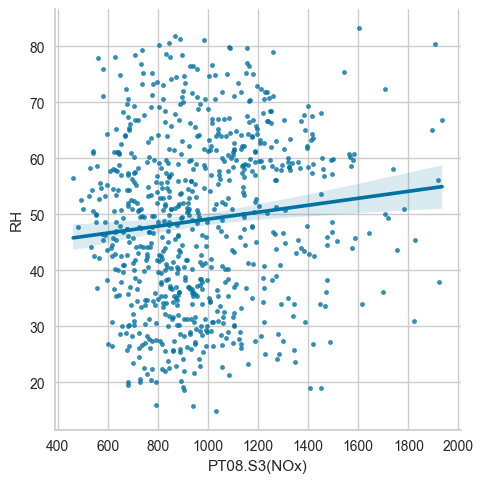

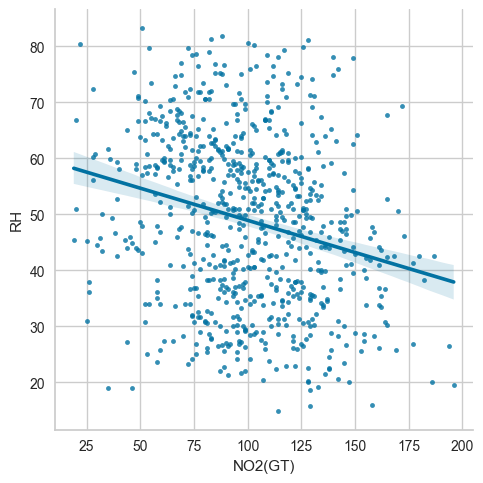

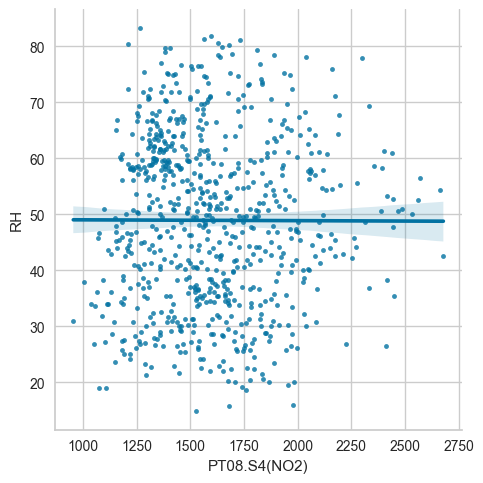

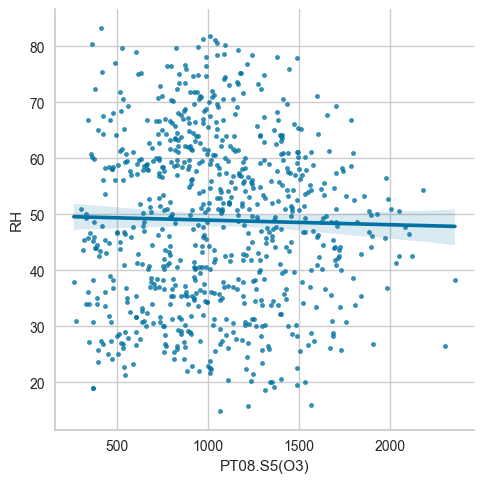

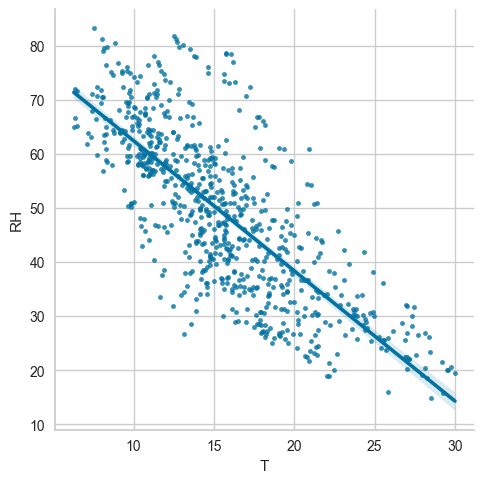

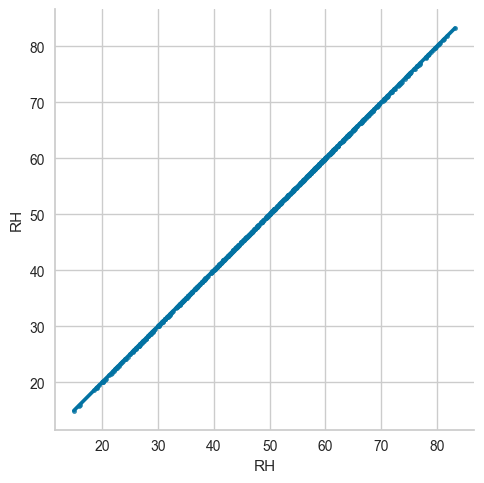

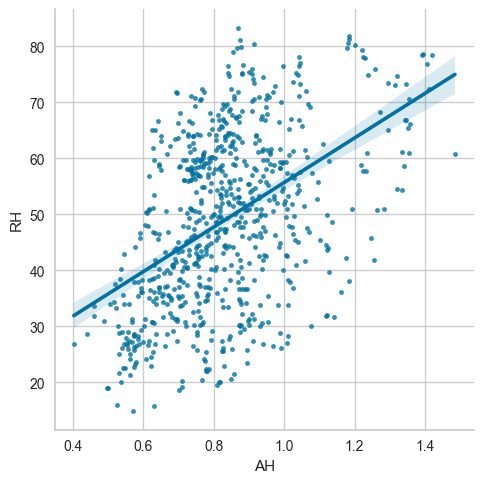

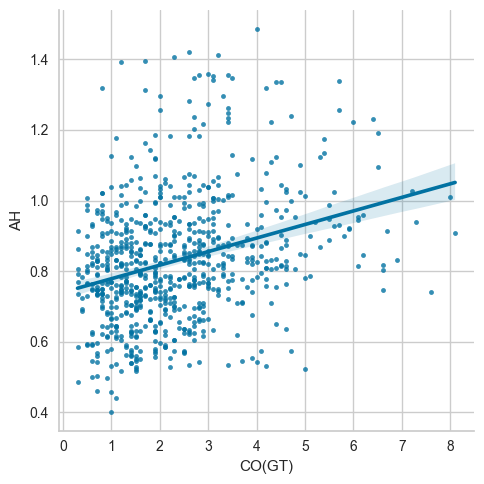

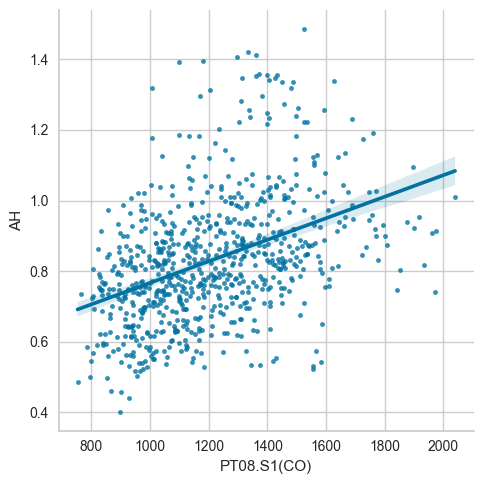

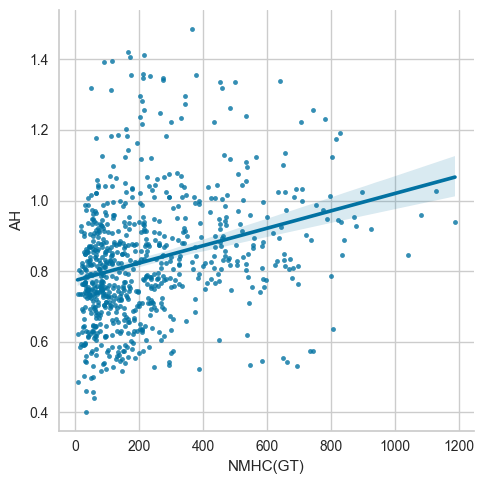

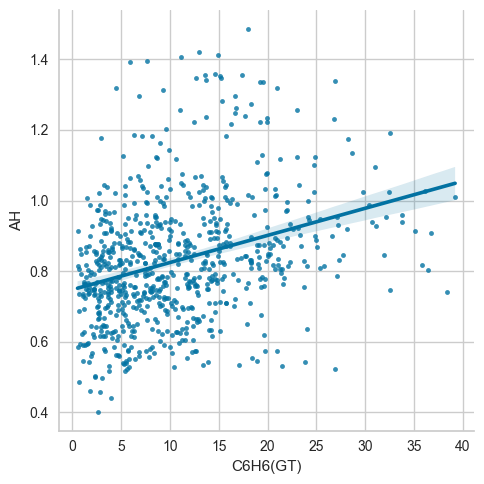

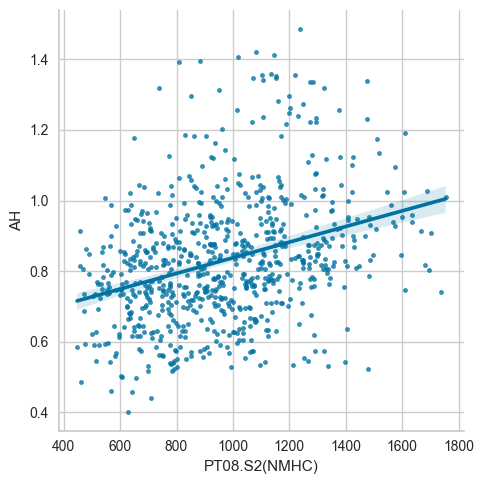

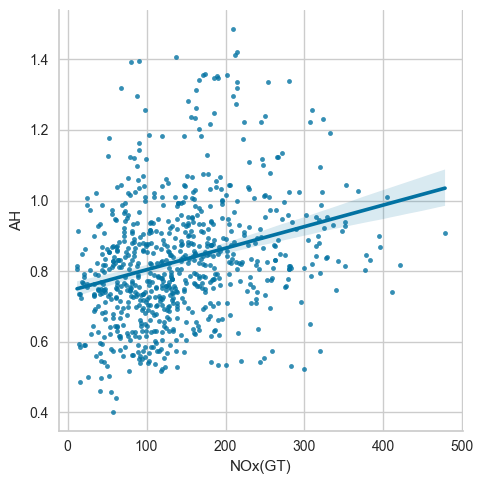

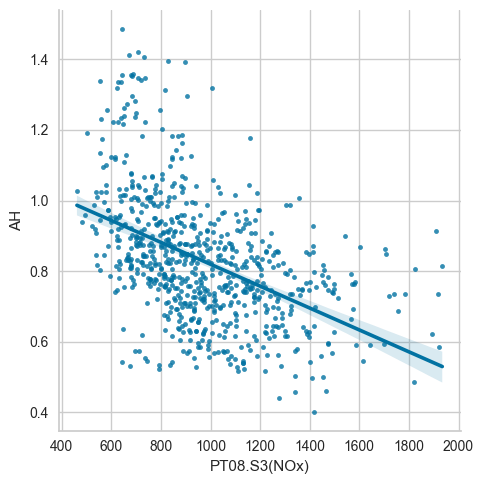

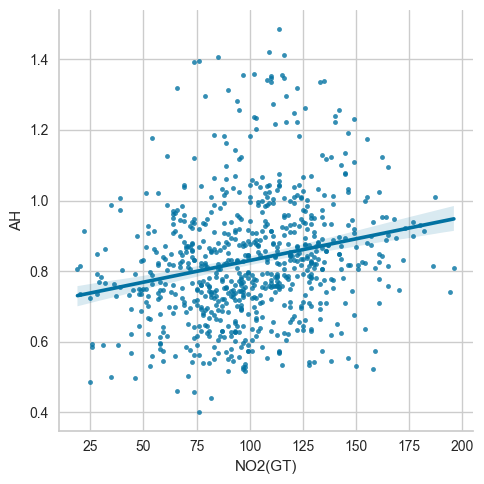

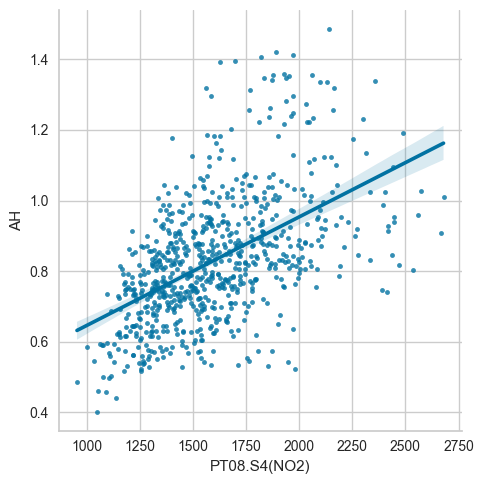

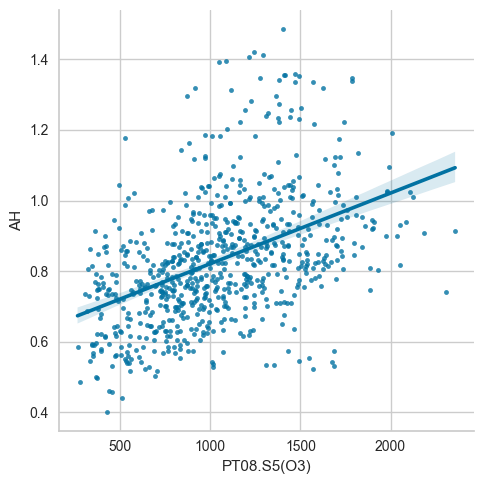

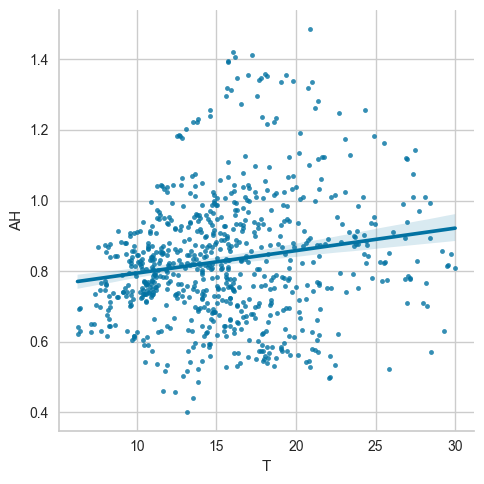

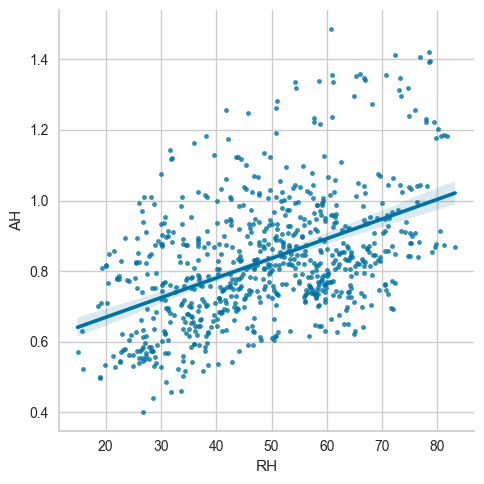

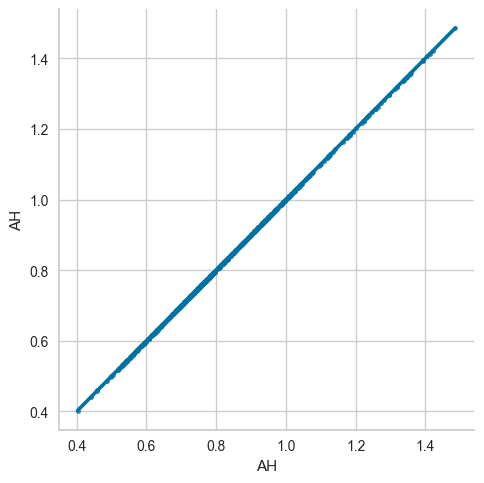

In [33]:
col_=sample_df.columns.tolist()[2:]
for i in sample_df.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=sample_df,markers='.')
for j in sample_df.columns.tolist()[2:]:
    sns.lmplot(x=j,y='AH',data=sample_df,markers='.')

Text(0.5, 1.0, 'histogram for Absolute Humdidity')

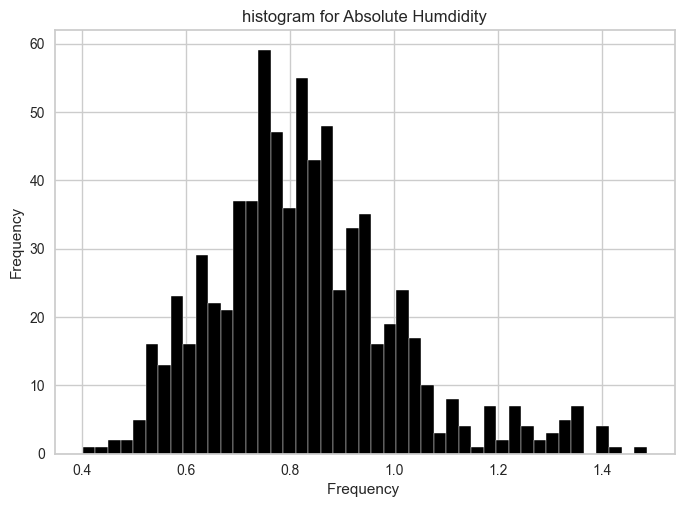

In [34]:
plt.hist(sample_df["AH"], color="black", edgecolor="white", bins=int(45/1))
plt.xlabel('Frequency ')
plt.ylabel('Frequency')
plt.title('histogram for Absolute Humdidity')

In [35]:
import statsmodels.api as sm
X_train1=sm.add_constant(X_train)
X_test1=sm.add_constant(X_test)
ols_model=sm.OLS(y_train,X_train1)
ols_results=ols_model.fit()
#y_pred_train=ols_results.predict(X_train1)
y_pred_test=ols_results.predict(X_test1)
print(ols_results.summary())
print("prediction",y_pred_test)

                            OLS Regression Results                            
Dep. Variable:                     AH   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     763.1
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        14:37:07   Log-Likelihood:                 974.36
No. Observations:                 562   AIC:                            -1923.
Df Residuals:                     549   BIC:                            -1866.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3063      0.094     -3.264

In [36]:
import math
import sklearn.metrics
mse =sklearn.metrics.mean_squared_error(y_test, y_pred_test)
print("mse",mse)

mse 0.0018944580554106564


In [37]:
f_statistic = ols_results.fvalue
p_value = ols_results.f_pvalue
print('F-statistic:' , f_statistic)
print('p-value:' , p_value)

F-statistic: 763.132233088727
p-value: 0.0


In [38]:
from scipy.stats import f
n = len(y)
k = X_train.shape[1]
X = np.concatenate([np.ones((n, 1)), X], axis=1)
rss = np.sum((y_test - y_pred)**2)
tss = np.sum((y_test - np.mean(y))**2)
f_statistic = ((tss - rss) / k) / (rss / (n - k - 1))
p_value = f.sf(f_statistic, k, n - k - 1)
print('F-statistic: ', f_statistic)
print('p-value: ', p_value)

F-statistic:  AH    978.117439
dtype: float64
p-value:  [0.]


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from statsmodels.api import OLS, add_constant
scaler=StandardScaler()
X0=scaler.fit_transform(X_train)
X9 = scaler.transform(X_test)
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X0, i) for i in range(X0.shape[1])]
vif["features"] = X_train.columns
print("vif", vif)
ridge=Ridge(alpha=0.05)
ridge.fit(X0, y_train)
y_pred_r=ridge.predict(X9)
r2_r=r2_score(y_test, y_pred_r)
mse1=mean_squared_error(y_test,y_pred_r)
adj_r21 = 1 - ((1 - r2_r) * (n - 1) / (n - k - 1))
print("r-squared", r2_r)
print("mse", mse1)
print("adj_R",adj_r21)
print("AH prediction", y_pred_r)

vif     VIF Factor       features
0    40.865584         CO(GT)
1    22.020970    PT08.S1(CO)
2     6.679821       NMHC(GT)
3   150.487907       C6H6(GT)
4   168.192826  PT08.S2(NMHC)
5    15.355598        NOx(GT)
6    18.208317   PT08.S3(NOx)
7     8.195000        NO2(GT)
8    50.552890   PT08.S4(NO2)
9    12.299319    PT08.S5(O3)
10    5.877380              T
11    7.901833             RH
r-squared 0.9409135494914775
mse 0.001894544563779353
adj_R 0.9399514905958164
AH prediction [[0.49643105]
 [0.76572199]
 [0.81950958]
 [0.6639968 ]
 [0.86522746]
 [0.78806892]
 [0.83473165]
 [0.84879676]
 [0.70167228]
 [0.82079828]
 [0.88447899]
 [0.74484956]
 [0.68931992]
 [0.85557273]
 [0.87201875]
 [0.77668978]
 [0.96212002]
 [0.73886533]
 [0.85616257]
 [0.90834484]
 [0.89250182]
 [1.26369445]
 [0.87379248]
 [0.68914845]
 [0.89022228]
 [0.9974878 ]
 [0.63278608]
 [0.84223128]
 [0.68988748]
 [0.67863954]
 [0.54337355]
 [0.75621521]
 [0.92767208]
 [0.9681962 ]
 [0.88482934]
 [0.99034698]
 [0.62294

In [40]:
#AQ1 = add_constant(AQ)
vif1=pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif1["features"] = X_train.columns
print("vif", vif1)


vif      VIF Factor       features
0    152.569538         CO(GT)
1    542.311207    PT08.S1(CO)
2     14.202607       NMHC(GT)
3    159.507527       C6H6(GT)
4    756.039149  PT08.S2(NMHC)
5     62.363108        NOx(GT)
6     36.902070   PT08.S3(NOx)
7     86.900072        NO2(GT)
8   1303.323171   PT08.S4(NO2)
9     91.085576    PT08.S5(O3)
10    66.199262              T
11    86.610097             RH


In [41]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.05)
lasso.fit(X0,y_train)
yl=lasso.predict(X9)
rl=r2_score(y_test,yl)
adj=1 - ((1 - rl) * (n - 1) / (n - k - 1))
print("msel",mean_squared_error(y_test,yl))
print("r2", rl)
print("adj", adj)
selected_indices = lasso.coef_ != 0
selected_features = X_train.columns[selected_indices]
#selected_vars = [features[i] for i in range(len(selected_indices)) if selected_indices[i]]
print('Selected features: ', selected_features)
print("coefficient", lasso.coef_)
print("predicted vaue", yl)

msel 0.02065852592938845
r2 0.3557084941455093
adj 0.34521799472861125
Selected features:  Index(['PT08.S3(NOx)', 'PT08.S4(NO2)', 'RH'], dtype='object')
coefficient [ 0.          0.          0.          0.          0.          0.
 -0.00104089  0.          0.03805919  0.          0.          0.0362547 ]
predicted vaue [0.74651646 0.81081363 0.77235373 0.79523684 0.80759577 0.83711116
 0.81106176 0.82713107 0.81240744 0.82426018 0.81536344 0.77633986
 0.74677372 0.7661659  0.87285981 0.80295115 0.85908123 0.76424355
 0.80640662 0.79396756 0.82037835 0.91672114 0.88208912 0.79183745
 0.8337218  0.95551436 0.72537803 0.92890025 0.78871775 0.78320583
 0.73947956 0.8261578  0.84604696 0.86944254 0.85897494 0.91103033
 0.75239146 0.83379905 0.93704355 0.80728187 0.91161698 0.82964018
 0.90337912 0.80776614 0.81196817 0.83114355 0.91545647 0.71200581
 0.9091878  0.81018452 0.86879814 0.81135542 0.73561261 0.80355626
 0.80372156 0.90554327 0.78656054 0.74645885 0.76747466 0.83026618
 0.84295846